### Logistics Regression (Decision Boundary)

Step 1: import python Libraries
-   အခုတစ်ခါမှာတော့ ကျွန်တော်တို့က Regression (ကိန်းဂဏန်းခန့်မှန်းခြင်း) ကနေ Classification (အမျိုးအစားခွဲခြားခြင်း) ဘက်ကို ကူးပြောင်းလေ့လာတော့မှာ ဖြစ်ပါတယ်။ ဒီနေရာမှာ အဓိကသုံးမယ့် Algorithm ကတော့ Logistic Regression ဖြစ်ပါတယ်။

In [1]:
import pandas as pd

Step 2: (Importing the Dataset)
-   အခု ကျွန်တော်တို့ အသုံးပြုမယ့် Dataset ကတော့ Social Network Ads ဖြစ်ပါတယ်။ ဒါက လူတစ်ယောက်ရဲ့ အသက် (Age) နဲ့ ခန့်မှန်းလစာ (Estimated Salary) ပေါ်မူတည်ပြီး သူဟာ ကြော်ငြာထားတဲ့ ပစ္စည်း (ဥပမာ- ကား) ကို ဝယ်ယူခြင်း ရှိ/မရှိ (Purchased: 0 သို့မဟုတ် 1) ကို ခွဲခြားပေးမယ့် Classification ပုစ္ဆာ ဖြစ်ပါတယ်။

In [2]:
# IMPORTING THE DATASET
social_N_data = pd.read_csv(r'C:\Users\ThinkBook\Desktop\AI\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\hak_advertising\diabetes.csv')

display(social_N_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####   # --- Method 2: Decision Boundary (Age နဲ့ Salary နှစ်ခုလုံးကို သုံးမယ်) ---

Step 3: Multiple Features အသုံးပြုခြင်း (Age + Salary)
-   ယခုတစ်ခါမှာတော့ ပိုမိုတိကျတဲ့ ခန့်မှန်းချက်ရရှိဖို့အတွက် "အသက် (Age)" အပြင် "ခန့်မှန်းလစာ (Estimated Salary)" ကိုပါ Feature အဖြစ် ထည့်သွင်းမှာ ဖြစ်ပါတယ်။ Feature နှစ်ခုဖြစ်သွားတဲ့အတွက် Model ဟာ graph ပေါ်မှာ မျဉ်းကွေး (Curve) တစ်ခုတည်းမဟုတ်ဘဲ နယ်နိမိတ် (Boundary) တစ်ခုကို တည်ဆောက်သွားမှာပါ။

In [5]:
from sklearn.model_selection import train_test_split # Data ကို သင်ယူရန်နှင့် စစ်ဆေးရန် ခွဲထုတ်ဖို့

# Feature နှစ်ခုကို X2 အဖြစ် သတ်မှတ်ခြင်း
X2 = social_N_data[['Pregnancies', 'Glucose']].values
y = social_N_data['BloodPressure'].values

# Data ကို Training (၇၅%) နှင့် Test (၂၅%) ခွဲထုတ်ခြင်း
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=0)

Step 4: Feature Scaling နှင့် Model Training (2D)
-   ယခုအဆင့်သည် Logistic Regression တွင် အလွန်အရေးကြီးသော အပိုင်းဖြစ်ပါတယ်။ Age (၂၀-၆၀) နှင့် Salary (၂၀,၀၀၀-၁၅၀,၀၀၀) တို့သည် ကိန်းဂဏန်းတန်ဖိုး ကွာဟချက် အလွန်ကြီးမားသည့်အတွက် Model က လစာကို ပိုအရေးကြီးသည်ဟု မှားယွင်းယူဆခြင်းမရှိစေရန် Scaling လုပ်ပေးရခြင်း ဖြစ်ပါတယ်။

In [6]:
from sklearn.linear_model import LogisticRegression   
from sklearn.preprocessing import StandardScaler      # Data များကို Scale ညှိရန် (ဥပမာ- -3 နှင့် 3 ကြား)

# Feature Scaling (Decision Boundary အတွက် အရေးကြီးပါတယ်)
sc = StandardScaler()

# Training Data ကို သုံးပြီး Scale ညှိရန် (Mean 0 နှင့် Standard Deviation 1 ဖြစ်အောင် ညှိခြင်း)
X2_train_scaled = sc.fit_transform(X2_train)

# Test Data ကိုလည်း Training Data ၏ Scale အတိုင်း ပြောင်းလဲခြင်း
X2_test_scaled = sc.transform(X2_test)

# Model အသစ် (model_2d) တည်ဆောက်ပြီး Scaled Data များဖြင့် သင်ကြားပေးခြင်း
model_2d = LogisticRegression()
model_2d.fit(X2_train_scaled, y2_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Step 5: Accuracy ကို ပြန်လည်စစ်ဆေးခြင်း (Comparing the Results)
-   ယခု Features (၂) ခုစလုံးကို အသုံးပြုထားသော Model ၏ တိကျမှုကို တိုင်းတာကြည့်သည့်အခါ အသက် (Age) တစ်ခုတည်း သုံးခဲ့စဉ်ကထက် တိကျမှု သိသိသာသာ ပြောင်းလဲသွားသည်ကို တွေ့ရမည်ဖြစ်ပါသည်။

In [7]:
from sklearn.metrics import accuracy_score  

# ၁။ Scaled လုပ်ထားသော Test Data ကို သုံးပြီး ခန့်မှန်းခြင်း
y2_pred = model_2d.predict(X2_test_scaled)

# ၂။ Accuracy ကို တွက်ချက်ခြင်း
acc_2d = accuracy_score(y2_test, y2_pred)

print(f"Accuracy with Age & Salary: {acc_2d :.2f}")

Accuracy with Age & Salary: 0.05


Step 6: Decision Boundary ကို ပုံဖော်ခြင်း (Visualizing the Decision Regions)
-   ဒါကတော့ Logistic Regression ရဲ့ နောက်ဆုံးနဲ့ အကောင်းဆုံးအပိုင်းပါ။ အသက် (Age) နဲ့ လစာ (Salary) ပေါင်းစပ်လိုက်တဲ့အခါ Model က ဘယ်လိုစည်းခြားပြီး အမျိုးအစားခွဲခြားသလဲဆိုတာကို ကွက်ကွက်ကွင်းကွင်း မြင်ရမှာ ဖြစ်ပါတယ်။

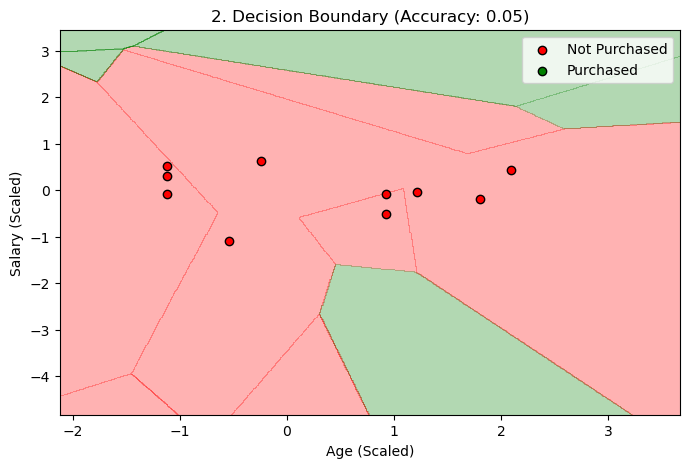

In [8]:
import numpy as np
import matplotlib.pyplot as plt      
from matplotlib.colors import ListedColormap 

# Decision Boundary Plot
plt.figure(figsize=(8, 5))
X_set, y_set = X2_test_scaled, y2_test

# ပုံဆွဲရန် Grid နယ်နိမိတ် သတ်မှတ်ခြင်း
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Grid တစ်ခုလုံးရှိ အမှတ်များအတွက် Class ခန့်မှန်းခြင်း
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# ခန့်မှန်းထားသော နယ်မြေများကို အရောင်ခြယ်ခြင်း (အနီ = မဝယ်၊ အစိမ်း = ဝယ်)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

# တကယ့် Test Data အစက်လေးများကို ထပ်တင်ခြင်း
plt.scatter(X_set[y_set==0, 0], X_set[y_set==0, 1], c='red', label='Not Purchased', edgecolors='k')
plt.scatter(X_set[y_set==1, 0], X_set[y_set==1, 1], c='green', label='Purchased', edgecolors='k')

plt.title(f'2. Decision Boundary (Accuracy: {acc_2d:.2f})')
plt.xlabel('Age (Scaled)')
plt.ylabel('Salary (Scaled)')
plt.legend()
plt.show()